In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data_Generation/Data_files/bfs_heisenberg_w_mult_paths.csv")
og_df = pd.read_csv("../Data_Generation/Data_files/bfs_heisenberg_w_mult_paths.csv")

In [3]:
# just the duplicated rows
# adapted from ChatGPT
df = df[df.duplicated(subset=['val1', 'val2', 'val3'], keep=False)]
df

,val1,val2,val3,num_steps,last_matrix
4,-1,-1,-23,26,2
7,1,1,-23,26,2
11,0,1,-24,26,0
12,-2,2,-24,26,3
13,-2,-2,-22,26,2
...,...,...,...,...,...
359150,0,1,2,4,2
359151,-1,1,1,4,1
359152,2,-1,0,4,3
359156,1,-2,-1,4,1


In [4]:
# few = df[(df['val1']==-1) & (df['val2']==-1) & (df['val3']==-23)]
# few

In [5]:
# df.groupby(['val1', 'val2', 'val3']).size() > 1

In [6]:
counts_for_each = dict()

def apply_my_fxn(row):
    cur_tuple = (row['val1'], row['val2'], row['val3'])
    if cur_tuple not in counts_for_each:
        counts_for_each[cur_tuple] = [row['last_matrix']]
    else:
        counts_for_each[cur_tuple].append(row['last_matrix'])

df.apply(apply_my_fxn, axis=1)

4         None
7         None
11        None
12        None
13        None
          ... 
359150    None
359151    None
359152    None
359156    None
359159    None
Length: 307496, dtype: object

In [7]:
def counts_for_each_to_row(row):
    cur_tuple = (row['val1'], row['val2'], row['val3'])
    return counts_for_each[cur_tuple]

df['all_possible_last_matrices'] = df.apply(counts_for_each_to_row, axis=1)

In [8]:
df['all_possible_last_matrices']

4         [2, 3, 1]
7         [2, 3, 0]
11           [0, 3]
12           [3, 1]
13        [2, 3, 1]
            ...    
359150       [1, 2]
359151       [3, 1]
359152       [0, 3]
359156       [3, 1]
359159       [2, 1]
Name: all_possible_last_matrices, Length: 307496, dtype: object

In [9]:
def list_to_tuple(row):
    return tuple(row['all_possible_last_matrices'])

testingOutput = df.apply(list_to_tuple, axis=1)

In [10]:
testDf = pd.DataFrame(testingOutput, columns=['tuples'])
testDf

,tuples
4,"(2, 3, 1)"
7,"(2, 3, 0)"
11,"(0, 3)"
12,"(3, 1)"
13,"(2, 3, 1)"
...,...
359150,"(1, 2)"
359151,"(3, 1)"
359152,"(0, 3)"
359156,"(3, 1)"


In [11]:
testDf.groupby('tuples').size()

tuples
(0, 1, 2)        6693
(0, 1, 3)        6693
(0, 1, 3, 2)        4
(0, 2)          16902
(0, 2, 1)        1302
(0, 3)          16902
(0, 3, 1)        1302
(1, 0, 2)        7002
(1, 0, 2, 3)        4
(1, 0, 3)        7002
(1, 2)          15810
(1, 2, 0)        1209
(1, 2, 0, 3)      164
(1, 3)          15810
(1, 3, 0)        1209
(1, 3, 0, 2)      164
(2, 0)          43682
(2, 0, 3)         546
(2, 1)          44774
(2, 1, 3)         504
(2, 3, 0)        7557
(2, 3, 1)        7599
(3, 0)          43682
(3, 0, 2)         546
(3, 1)          44774
(3, 1, 2)         504
(3, 2, 0)        7557
(3, 2, 1)        7599
dtype: int64

In [12]:
import copy
# how to do a deepcopy adapted from ChatGPT

def sort_all_possible_last_matrices(row):
    cur_list = copy.deepcopy(row['all_possible_last_matrices'])
    cur_list.sort()
    return cur_list

df['better'] = df.apply(sort_all_possible_last_matrices, axis=1)
df

,val1,val2,val3,num_steps,last_matrix,all_possible_last_matrices,better
4,-1,-1,-23,26,2,"[2, 3, 1]","[1, 2, 3]"
7,1,1,-23,26,2,"[2, 3, 0]","[0, 2, 3]"
11,0,1,-24,26,0,"[0, 3]","[0, 3]"
12,-2,2,-24,26,3,"[3, 1]","[1, 3]"
13,-2,-2,-22,26,2,"[2, 3, 1]","[1, 2, 3]"
...,...,...,...,...,...,...,...
359150,0,1,2,4,2,"[1, 2]","[1, 2]"
359151,-1,1,1,4,1,"[3, 1]","[1, 3]"
359152,2,-1,0,4,3,"[0, 3]","[0, 3]"
359156,1,-2,-1,4,1,"[3, 1]","[1, 3]"


In [13]:
# all the points with zeroes except the upper right hand corner are exactly the points where every fifrst move is optimal
filtering = testDf[(df['val1']==0) & (df['val3']==0)]
filtering.groupby('tuples').size()

tuples
(0, 1, 3, 2)      4
(1, 0, 2, 3)      4
(1, 2, 0, 3)    164
(1, 3, 0, 2)    164
dtype: int64

In [14]:
def new_list_to_tuple(row):
    return tuple(row['better'])

testingOutput = df.apply(new_list_to_tuple, axis=1)

testDf = pd.DataFrame(testingOutput, columns=['tuples'])

testDf.groupby('tuples').size()

tuples
(0, 1, 2)       16206
(0, 1, 2, 3)      336
(0, 1, 3)       16206
(0, 2)          60584
(0, 2, 3)       16206
(0, 3)          60584
(1, 2)          60584
(1, 2, 3)       16206
(1, 3)          60584
dtype: int64

In [15]:
df.groupby(['val1', 'val2', 'val3']).size().sort_values(ascending=False)

val1  val2  val3
 0     30   0       4
       33   0       4
       29   0       4
       11   0       4
       22   0       4
                   ..
-5    -49   14      2
            13      2
            9       2
            0       2
 24    46   2       2
Length: 142860, dtype: int64

In [16]:
few = df[(df['val1']==0) & (df['val2']==11) & (df['val3']==0)]
few

,val1,val2,val3,num_steps,last_matrix,all_possible_last_matrices,better
334143,0,11,0,14,1,"[1, 2, 0, 3]","[0, 1, 2, 3]"
336240,0,11,0,14,2,"[1, 2, 0, 3]","[0, 1, 2, 3]"
337396,0,11,0,14,0,"[1, 2, 0, 3]","[0, 1, 2, 3]"
337761,0,11,0,14,3,"[1, 2, 0, 3]","[0, 1, 2, 3]"


In [17]:
def row_to_matrix(row):
    return np.array([
        [1, int(row['val1']), int(row['val2'])],
        [0, 1, int(row['val3'])],
        [0, 0, 1]
    ])
def matrix_to_tuple(matrix):
    return (matrix[0][1], matrix[0][2], matrix[1][2])

In [18]:
arr = row_to_matrix(few.sample(1))

In [19]:
# B is the inverse of A
A = np.array([[1, 1, 0], [0, 1, 0], [0, 0, 1]])
B = np.array([[1, -1, 0], [0, 1, 0], [0, 0, 1]])

identity = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# C is the inverse of D
C = np.array([[1, 0, 0], [0, 1, 1], [0, 0, 1]])
D = np.array([[1, 0, 0], [0, 1, -1], [0, 0, 1]])

In [20]:
# right this is the nasty irritating definition that comes when you have to remember to multiply from the correct side
def apply_next_step(arr, step):
    if step==0:
        return arr @ B
    elif step==1:
        return arr @ A
    elif step==2:
        return arr @ D
    elif step==3: 
        return arr @ C
    assert 1==2

In [21]:
cur = arr @ D

for i in range(100):
    cur_tuple = matrix_to_tuple(cur)
    cur_few = og_df[(og_df['val1']==cur_tuple[0]) & (og_df['val2']==cur_tuple[1]) & (og_df['val3']==cur_tuple[2])]
    next_step = int(cur_few.iloc[0]['last_matrix'])
    cur = apply_next_step(cur, next_step)
    if (cur==identity).all(): 
        break
print(i)

12


In [22]:
cur_few = df[(df['val1']==1) & (df['val2']==11) & (df['val3']==0)]
cur_few

,val1,val2,val3,num_steps,last_matrix,all_possible_last_matrices,better
338988,1,11,0,13,3,"[3, 1, 2]","[1, 2, 3]"
340623,1,11,0,13,1,"[3, 1, 2]","[1, 2, 3]"
341046,1,11,0,13,2,"[3, 1, 2]","[1, 2, 3]"


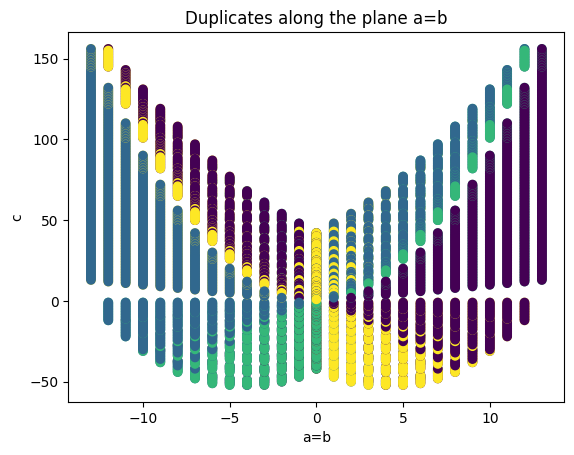

In [23]:
parabola = df[df['val1']==df['val3']]
plt.scatter(x=parabola['val1'], y=parabola['val2'], c=parabola['last_matrix'])
plt.xlabel("a=b")
plt.ylabel("c")
plt.title("Duplicates along the plane a=b")
plt.show()

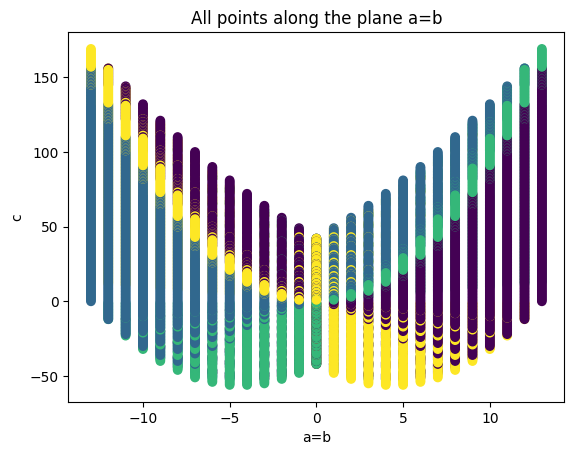

In [24]:
og_parabola = og_df[og_df['val1']==og_df['val3']]

plt.scatter(x=og_parabola['val1'], y=og_parabola['val2'], c=og_parabola['last_matrix'])

plt.xlabel("a=b")
plt.ylabel("c")
plt.title("All points along the plane a=b")
plt.show()

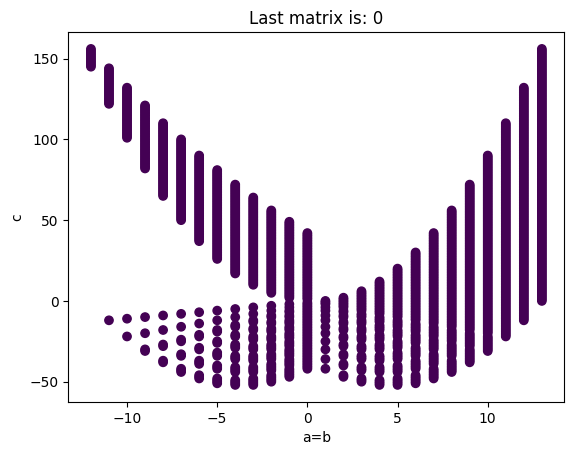

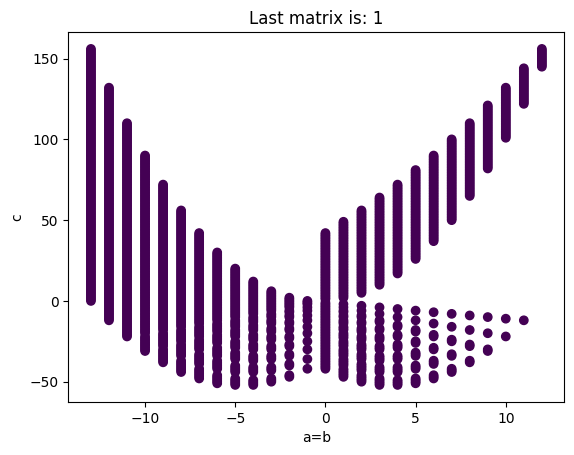

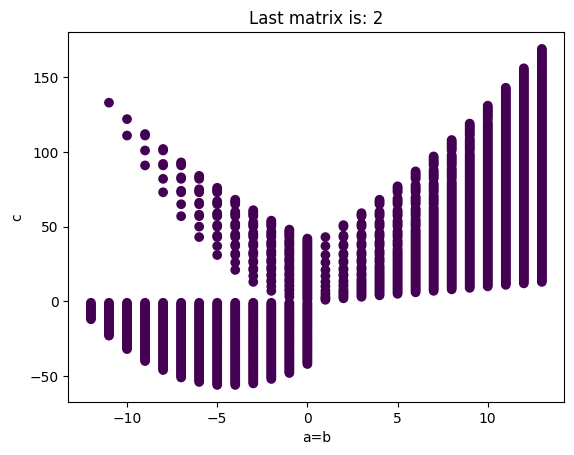

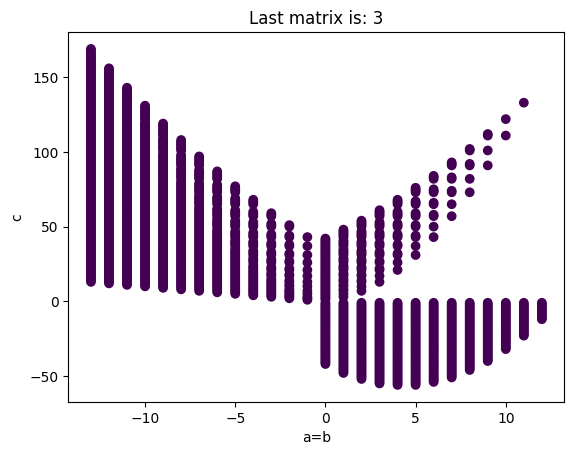

In [25]:
filtered_df = og_df[og_df['val1']==og_df['val3']]

for i in [0, 1, 2, 3]:
    more_filter = filtered_df[filtered_df['last_matrix']==i]
    plt.scatter(x=more_filter['val1'], y=more_filter['val2'], c=more_filter['last_matrix'])
    plt.xlabel("a=b")
    plt.ylabel("c")
    plt.title(f"Last matrix is: {i}")
    plt.show()

In [26]:
few = og_df[(og_df['val1']==1) & (og_df['val2']==1) & (og_df['val3']==1)]
few

,val1,val2,val3,num_steps,last_matrix
359210,1,1,1,2,2


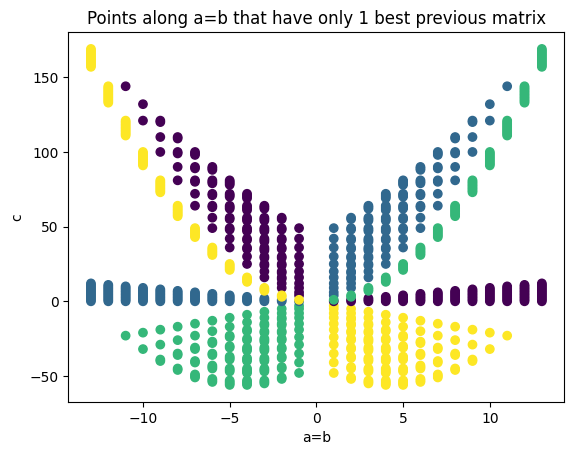

In [27]:
# how to do an anti-join adapted from ChatGPT
anti_join = pd.merge(og_parabola, parabola, on=['val1', 'val2', 'val3'], how='left', indicator=True)
anti_join = anti_join[anti_join['_merge'] == 'left_only'].drop(columns='_merge')

plt.scatter(x=anti_join['val1'], y=anti_join['val2'], c=anti_join['last_matrix_x'])

plt.xlabel("a=b")
plt.ylabel("c")
plt.title("Points along a=b that have only 1 best previous matrix")
plt.show()

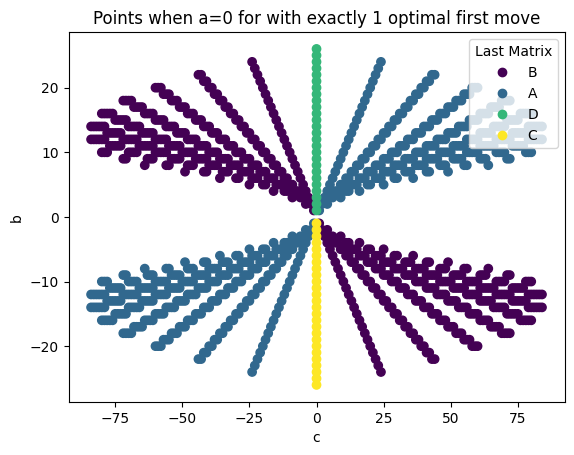

In [29]:
anti_join = pd.merge(og_df, df, on=['val1', 'val2', 'val3'], how='left', indicator=True)
anti_join = anti_join[anti_join['_merge'] == 'left_only'].drop(columns='_merge')

fig, ax = plt.subplots()

filtered_anti = anti_join[anti_join['val1'] == 0]

scatter = ax.scatter(x=filtered_anti['val2'], y=filtered_anti['val3'], c=filtered_anti['last_matrix_x'])

legend1 = ax.legend(scatter.legend_elements()[0], ["B", "A", "D", "C"],
                    loc="upper right", title="Last Matrix")

plt.xlabel("c")
plt.ylabel("b")
plt.title("Points when a=0 for with exactly 1 optimal first move")
plt.show()

In [32]:
filtered_anti

,val1,val2,val3,num_steps_x,last_matrix_x,num_steps_y,last_matrix_y,all_possible_last_matrices,better
0,0,0,-26,26,3,NaN,NaN,NaN,NaN
7611,0,0,26,26,2,NaN,NaN,NaN,NaN
15225,0,24,-24,26,0,NaN,NaN,NaN,NaN
19007,0,-24,24,26,0,NaN,NaN,NaN,NaN
22798,0,44,-22,26,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
732187,0,1,1,3,1,NaN,NaN,NaN,NaN
732192,0,0,-2,2,3,NaN,NaN,NaN,NaN
732195,0,0,2,2,2,NaN,NaN,NaN,NaN
732204,0,0,-1,1,3,NaN,NaN,NaN,NaN


In [34]:
filtered

,val1,val2,val3,num_steps_x,last_matrix_x,num_steps_y,last_matrix_y,all_possible_last_matrices,better
15225,0,24,-24,26,0,NaN,NaN,NaN,NaN
22798,0,44,-22,26,0,NaN,NaN,NaN,NaN
22810,0,43,-22,26,0,NaN,NaN,NaN,NaN
28602,0,60,-20,26,0,NaN,NaN,NaN,NaN
28625,0,59,-20,26,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
731145,0,4,-4,6,0,NaN,NaN,NaN,NaN
731290,0,4,-2,6,0,NaN,NaN,NaN,NaN
731785,0,3,-3,5,0,NaN,NaN,NaN,NaN
732073,0,2,-2,4,0,NaN,NaN,NaN,NaN


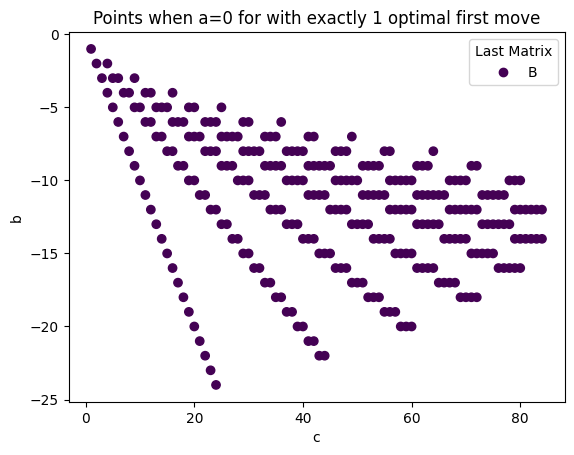

In [35]:
filtered = filtered_anti[(filtered_anti['val2'] > 0) &(filtered_anti['val3']<0)]

fig, ax = plt.subplots()

scatter = ax.scatter(x=filtered['val2'], y=filtered['val3'], c=filtered['last_matrix_x'])

legend1 = ax.legend(scatter.legend_elements()[0], ["B", "A", "D", "C"],
                    loc="upper right", title="Last Matrix")

plt.xlabel("c")
plt.ylabel("b")
plt.title("Points when a=0 for with exactly 1 optimal first move")
plt.show()

In [36]:
filtered[(filtered['val2']==20) & (filtered['val3']==-20)]

,val1,val2,val3,num_steps_x,last_matrix_x,num_steps_y,last_matrix_y,all_possible_last_matrices,better
375873,0,20,-20,22,0,NaN,NaN,NaN,NaN


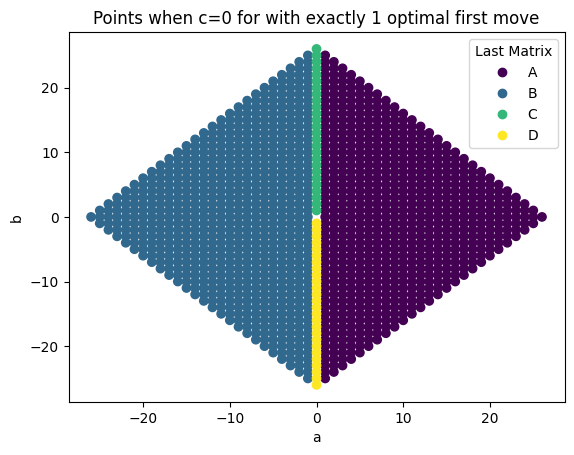

In [65]:
fig, ax = plt.subplots()

filtered_anti = anti_join[anti_join['val2'] == 0]

scatter = ax.scatter(x=filtered_anti['val1'], y=filtered_anti['val3'], c=filtered_anti['last_matrix_x'])

legend1 = ax.legend(scatter.legend_elements()[0], ["A", "B", "C", "D"],
                    loc="upper right", title="Last Matrix")

plt.xlabel("a")
plt.ylabel("b")
plt.title("Points when c=0 for with exactly 1 optimal first move")
plt.show()

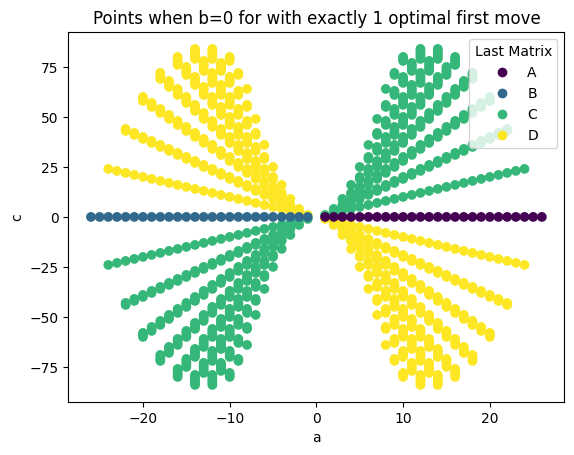

In [66]:
fig, ax = plt.subplots()

filtered_anti = anti_join[anti_join['val3'] == 0]

scatter = ax.scatter(x=filtered_anti['val1'], y=filtered_anti['val2'], c=filtered_anti['last_matrix_x'])

legend1 = ax.legend(scatter.legend_elements()[0], ["A", "B", "C", "D"],
                    loc="upper right", title="Last Matrix")

plt.xlabel("a")
plt.ylabel("c")
plt.title("Points when b=0 for with exactly 1 optimal first move")
plt.show()